In [452]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

# 1 Сбор данных

In [454]:
df = pd.read_csv('data.csv')
df.head(10)

,Муниципалитет,Математика_М_2024,Английский_язык_М_2024,Английский_язык_Р_2024,Английский_язык_З_2024,Английский_язык_Ш_2023,Английский_язык_М_2023,Английский_язык_Р_2023,Английский_язык_З_2023,Математика_Ш_2024,...,Информатика_М_2024,Информатика_З_2024,Информатика_Ш_2023,Информатика_М_2023,Информатика_Р_2023,Информатика_З_2023,Информатика_Р_2022,Информатика_Ш_2022,Информатика_М_2022,Информатика_З_2022
0,Новгородский район,269.0,108.0,66.0,20.0,330.0,241.0,70.0,19.0,483.0,...,181.0,16.0,631.0,NaN,46.0,14.0,49.0,319.0,101.0,1.0
1,Боровичский район,423.0,258.0,30.0,7.0,382.0,293.0,NaN,23.0,341.0,...,272.0,10.0,386.0,268.0,33.0,NaN,91.0,464.0,241.0,9.0
2,Валдайский район,207.0,NaN,44.0,20.0,382.0,153.0,61.0,14.0,729.0,...,279.0,0.0,312.0,237.0,32.0,20.0,63.0,100.0,NaN,1.0
3,Крестецкий район,259.0,262.0,NaN,NaN,301.0,321.0,56.0,1.0,426.0,...,156.0,23.0,327.0,104.0,27.0,14.0,85.0,430.0,250.0,7.0
4,Любытинский район,280.0,298.0,52.0,16.0,NaN,238.0,NaN,NaN,NaN,...,126.0,NaN,NaN,220.0,NaN,25.0,NaN,314.0,111.0,NaN
5,Маловишерский район,150.0,245.0,62.0,6.0,366.0,161.0,72.0,12.0,308.0,...,234.0,12.0,355.0,267.0,29.0,2.0,92.0,330.0,NaN,16.0
6,Пестовский район,NaN,25.0,31.0,100.0,372.0,NaN,76.0,4.0,439.0,...,NaN,23.0,412.0,NaN,91.0,NaN,41.0,NaN,205.0,24.0
7,Окуловский район,263.0,299.0,NaN,21.0,303.0,288.0,67.0,23.0,422.0,...,102.0,23.0,NaN,105.0,100.0,12.0,91.0,462.0,221.0,24.0
8,Шимский район,146.0,138.0,58.0,NaN,NaN,208.0,100.0,13.0,NaN,...,233.0,17.0,403.0,119.0,43.0,4.0,84.0,380.0,108.0,NaN
9,Чеховский район,212.0,199.0,76.0,3.0,446.0,159.0,57.0,22.0,NaN,...,121.0,NaN,304.0,25.0,NaN,NaN,NaN,NaN,173.0,10.0


In [455]:
rows = [] # Пустой список для строк

for col in df.columns[1:]: # Перебор всех столбцов, кроме 1-го
    parts = col.rsplit('_', 2)
    предмет = parts[0].replace('_', ' ')
    этап = parts[1]
    год = parts[2]
    
    for index, row in df.iterrows(): # Перебор всех строк в датасете
        муниципалитет = row['Муниципалитет']
        количество_участников = row[col]
        rows.append([муниципалитет, предмет, этап, год, количество_участников])

df = pd.DataFrame(rows, columns=['Муниципалитет', 'Предмет', 'Этап', 'Год', 'Количество участников'])

In [456]:
df.head(5)

,Муниципалитет,Предмет,Этап,Год,Количество участников
0,Новгородский район,Математика,М,2024,269.0
1,Боровичский район,Математика,М,2024,423.0
2,Валдайский район,Математика,М,2024,207.0
3,Крестецкий район,Математика,М,2024,259.0
4,Любытинский район,Математика,М,2024,280.0


# 2. Предобработка данных

## 2.1 Обработка пропущенных значений

Отобразим пропущенные значения на графике, где красные - пропущенные значения

<Axes: >

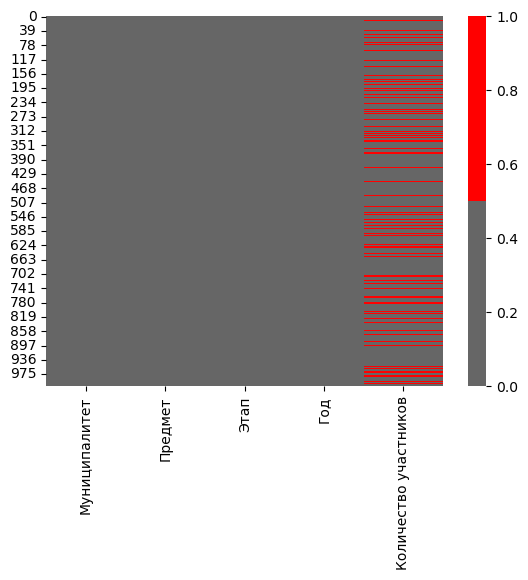

In [460]:
sns.heatmap(df.isnull(), cmap=sns.color_palette(['#666666', '#ff0000']))

In [461]:
for col in df.columns:
    missing = np.sum(df[col].isnull())
    print('{} - {}% - {} пропущенных значений'.format(col, (missing/len(df)*100).round(2), missing))

Муниципалитет - 0.0% - 0 пропущенных значений
Предмет - 0.0% - 0 пропущенных значений
Этап - 0.0% - 0 пропущенных значений
Год - 0.0% - 0 пропущенных значений
Количество участников - 15.48% - 156 пропущенных значений


Сохраняем старый датасет для дальнейшей оценки погрешности при допустимом количестве пропущенных значений

In [463]:
df_bad = df.copy()

Сортируем этапы в правильном порядке

In [465]:
stage_order = {"Ш": 0, "М": 1, "Р": 2, "З": 3}
df["Этап_порядок"] = df["Этап"].map(stage_order)
df.head(5)

,Муниципалитет,Предмет,Этап,Год,Количество участников,Этап_порядок
0,Новгородский район,Математика,М,2024,269.0,1
1,Боровичский район,Математика,М,2024,423.0,1
2,Валдайский район,Математика,М,2024,207.0,1
3,Крестецкий район,Математика,М,2024,259.0,1
4,Любытинский район,Математика,М,2024,280.0,1


Находим коэффициенты снижения кол-ва участников по этапам

In [467]:
# Рассчитываем коэффициенты переходов между этапами
coefficients = []

# Получаем уникальные числовые индексы этапов и сортируем их
unique_stages = np.sort(df["Этап_порядок"].unique())

# Итерация по переходу между этапами
for i in range(1, len(unique_stages)):
    prev_stage = unique_stages[i - 1]
    current_stage = unique_stages[i]
    
    reductions = []
    
    # Итерация по уникальным годам и предметам
    for year, subject in df[['Год', 'Предмет']].drop_duplicates().values:
        for municipality in df['Муниципалитет'].unique():
            prev_stage_participants = df[
                (df['Этап_порядок'] == prev_stage) & 
                (df['Год'] == year) & 
                (df['Предмет'] == subject) & 
                (df['Муниципалитет'] == municipality)
            ]['Количество участников'].sum()
            
            current_stage_participants = df[
                (df['Этап_порядок'] == current_stage) & 
                (df['Год'] == year) & 
                (df['Предмет'] == subject) & 
                (df['Муниципалитет'] == municipality)
            ]['Количество участников'].sum()
            
            # Проверяем на валидность данных
            if prev_stage_participants > 0 and current_stage_participants <= prev_stage_participants:
                reductions.append(current_stage_participants / prev_stage_participants)

    # Рассчитываем средний коэффициент для перехода между этапами
    mean_reduction = np.mean(reductions).round(2) if reductions else 1.0
    coefficients.append(mean_reduction)

print(coefficients)

[0.42, 0.28, 0.19]


Заменяем аномалии на кол-во участников предыдущего этапа умноженное на коэффициент

In [469]:
coefficients = [0.42, 0.28, 0.19]
# Перебираем все числовые значения этапов по порядку
for i in range(df['Этап_порядок'].nunique()):  # Итерация по числовым индексам этапов
    for j, row in df[df['Этап_порядок'] == i].iterrows():
        if pd.isna(row['Количество участников']):
            # Определяем предыдущий и следующий числовые индексы
            prev_stage_idx = i - 1 if i > 0 else None
            next_stage_idx = i + 1 if i + 1 < df['Этап_порядок'].nunique() else None

            # Количество участников для предыдущего этапа
            prev_participants = df[
                (df['Муниципалитет'] == row['Муниципалитет']) &
                (df['Предмет'] == row['Предмет']) &
                (df['Этап_порядок'] == prev_stage_idx) &
                (df['Год'] == row['Год'])
            ]['Количество участников'].iloc[0] if prev_stage_idx is not None else None

            # Количество участников для следующего этапа
            next_participants = df[
                (df['Муниципалитет'] == row['Муниципалитет']) &
                (df['Предмет'] == row['Предмет']) &
                (df['Этап_порядок'] == next_stage_idx) &
                (df['Год'] == row['Год'])
            ]['Количество участников'].iloc[0] if next_stage_idx is not None else None

            # Логика замены данных
            if pd.isna(prev_participants) and pd.isna(next_participants):
                # Если нет данных ни на предыдущем, ни на следующем этапе
                new_participants = round(df[df['Этап_порядок'] == i]['Количество участников'].mean())
            elif not pd.isna(prev_participants):
                # Если есть данные предыдущего этапа, используем коэффициент
                new_participants = round(prev_participants * coefficients[prev_stage_idx])
            elif not pd.isna(next_participants):
                # Если есть данные следующего этапа, используем коэффициент
                new_participants = round(next_participants * (coefficients[i] + 1))

            # Присваиваем рассчитанное значение пропущенному количеству участников
            if not pd.isna(new_participants):
                df.at[j, 'Количество участников'] = new_participants

Проверим корректную замену пропущенных значений

In [471]:
for col in df.columns:
    missing = np.sum(df[col].isnull())
    print('{} - {} пропущенных значений'.format(col, missing))

Муниципалитет - 0 пропущенных значений
Предмет - 0 пропущенных значений
Этап - 0 пропущенных значений
Год - 0 пропущенных значений
Количество участников - 0 пропущенных значений
Этап_порядок - 0 пропущенных значений


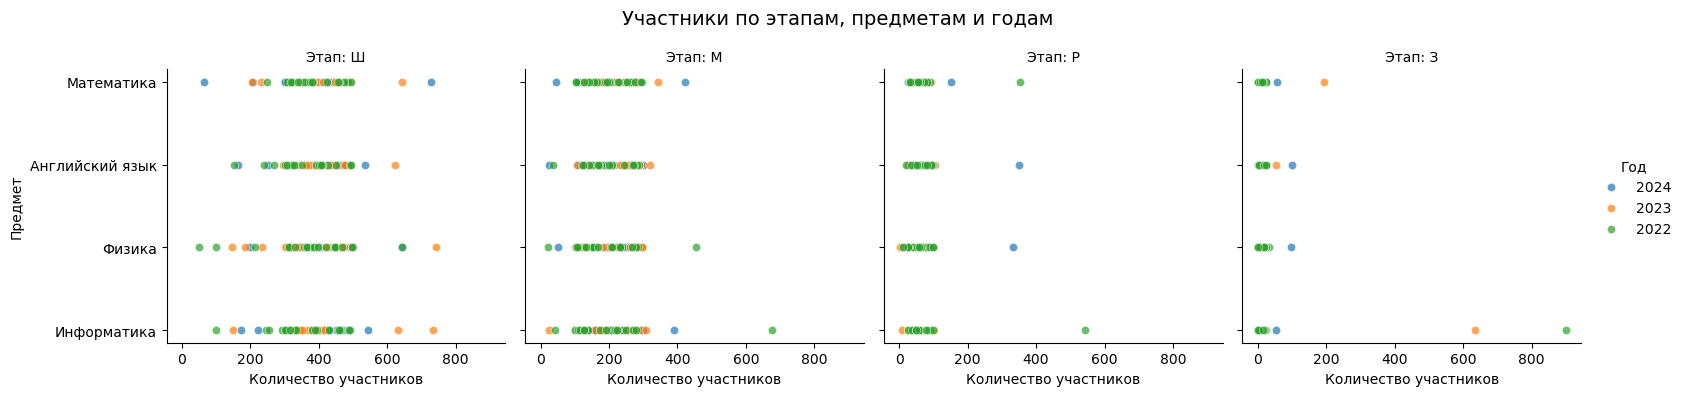

In [472]:
# Обратное отображение значений этапов
reverse_stage_order = {v: k for k, v in stage_order.items()}
df["Этап"] = df["Этап_порядок"].map(reverse_stage_order)

# Устанавливаем порядок этапов для отображения
ordered_stages = [reverse_stage_order[i] for i in sorted(stage_order.values())]

grid = sns.FacetGrid(df, col="Этап", col_wrap=4, height=4, hue="Год", col_order=ordered_stages)
grid.map(sns.scatterplot, "Количество участников", "Предмет", alpha=0.7)

grid.set_titles("Этап: {col_name}")
grid.set_axis_labels("Количество участников", "Предмет")
grid.fig.suptitle("Участники по этапам, предметам и годам", fontsize=14)

grid.add_legend(title="Год")

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()

## 2.2 Определены критические значения из пропущенных значений

In [474]:
threshold = 0.5
bad_col = df.isnull().mean()[df.isnull().mean() > threshold]

if not bad_col.empty:
    print(f'Столбцы с критическими значениями: {bad_col}')
else:
    print('Нет столбцов с критическими значениями')

Нет столбцов с критическими значениями


## 2.3 Очистка данных от ошибок и аномалий

Проверим датасет на наличие аномалий

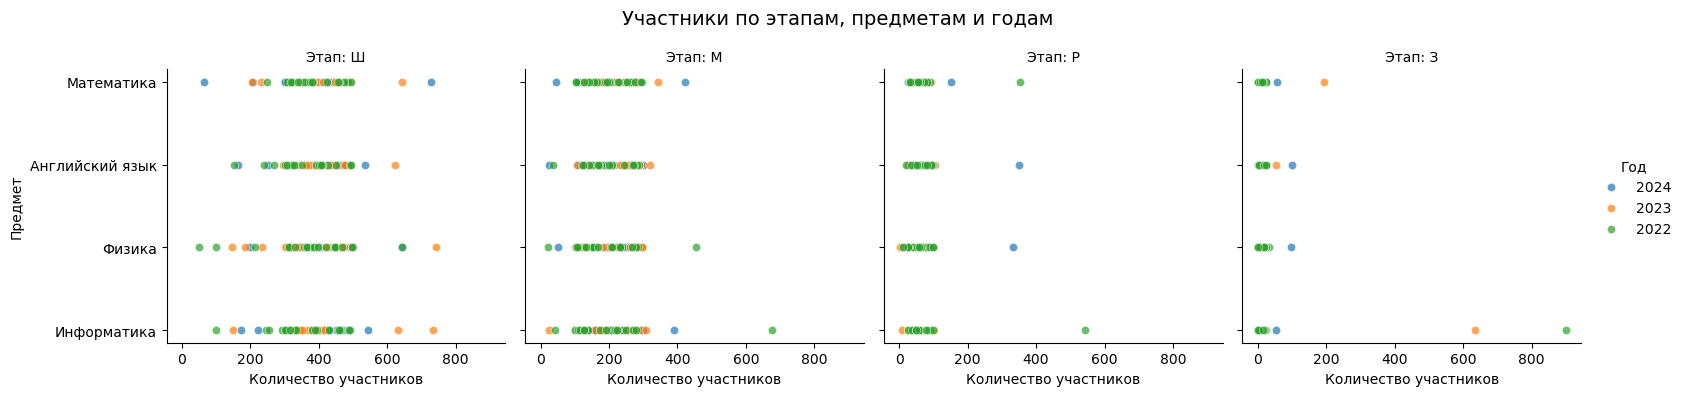

In [477]:
# Обратное отображение значений этапов
reverse_stage_order = {v: k for k, v in stage_order.items()}
df["Этап"] = df["Этап_порядок"].map(reverse_stage_order)

# Устанавливаем порядок этапов для отображения
ordered_stages = [reverse_stage_order[i] for i in sorted(stage_order.values())]

grid = sns.FacetGrid(df, col="Этап", col_wrap=4, height=4, hue="Год", col_order=ordered_stages)
grid.map(sns.scatterplot, "Количество участников", "Предмет", alpha=0.7)

grid.set_titles("Этап: {col_name}")
grid.set_axis_labels("Количество участников", "Предмет")
grid.fig.suptitle("Участники по этапам, предметам и годам", fontsize=14)

grid.add_legend(title="Год")

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()

На графиках вижу ошибки в значениях, но необычных данных не наблюдаю, т.е. аномалии отсутствуют

### Аномалии

Если есть аномалии, тогда впишем вручную значение, опираясь на график (допустим 1000), и заменим его на кол-во участников следующего этапа умноженное на коэф + 1

In [481]:
# Коэффициенты для каждого этапа
coefficients = [0.42, 0.28, 0.19]

# Обработка аномалий
for j, row in df[df['Этап_порядок'] == 1].iterrows():  # Только для школьного этапа (Этап_порядок == 1)
    if row['Количество участников'] > 1000:  # Проверяем, превышает ли количество участников 1000
        # Находим количество участников следующего этапа (Этап_порядок == 2)
        next_stage_idx = 2
        next_participants = df[
            (df['Муниципалитет'] == row['Муниципалитет']) &
            (df['Предмет'] == row['Предмет']) &
            (df['Этап_порядок'] == next_stage_idx) &
            (df['Год'] == row['Год'])
        ]['Количество участников']

        if not next_participants.empty:  # Если следующий этап существует
            # Заменяем значение на количество участников следующего этапа, умноженное на (коэффициент + 1)
            new_participants = round(next_participants.iloc[0] * (coefficients[0] + 1))
            df.at[j, 'Количество участников'] = new_participants

Проверяем заменились ли аномалии

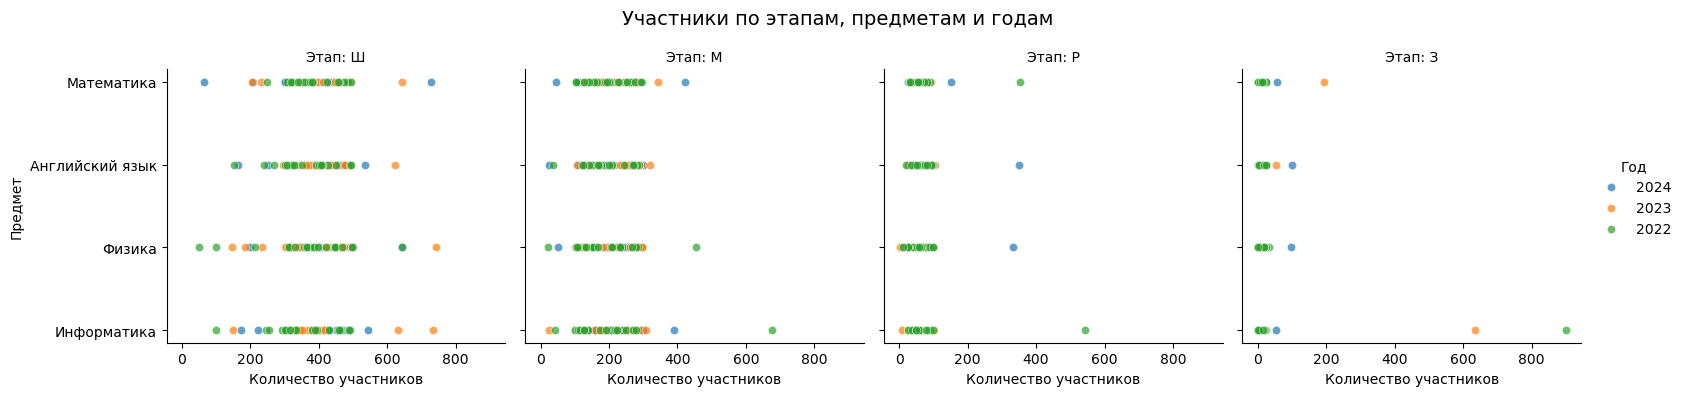

In [483]:
# Обратное отображение значений этапов
reverse_stage_order = {v: k for k, v in stage_order.items()}
df["Этап"] = df["Этап_порядок"].map(reverse_stage_order)

# Устанавливаем порядок этапов для отображения
ordered_stages = [reverse_stage_order[i] for i in sorted(stage_order.values())]

grid = sns.FacetGrid(df, col="Этап", col_wrap=4, height=4, hue="Год", col_order=ordered_stages)
grid.map(sns.scatterplot, "Количество участников", "Предмет", alpha=0.7)

grid.set_titles("Этап: {col_name}")
grid.set_axis_labels("Количество участников", "Предмет")
grid.fig.suptitle("Участники по этапам, предметам и годам", fontsize=14)

grid.add_legend(title="Год")

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()

В ходе анализа были выявлены и исправлены аномалии с необычным количеством участников на школьном этапе

### Ошибки

Находим ошибки и запишем их в anomalies_df

In [489]:
stage_order = {"Ш": 0, "М": 1, "Р": 2, "З": 3}
df["Этап_порядок"] = df["Этап"].map(stage_order)

# Проверяем аномалии внутри каждой группы
anomalies = []

for _, group in df.groupby(["Муниципалитет", "Предмет", "Год"]):
    group = group.sort_values("Этап_порядок")
    prev_row = None
    for _, row in group.iterrows():
        if prev_row is not None and row["Количество участников"] > prev_row["Количество участников"] and row["Этап_порядок"] > prev_row["Этап_порядок"]:
            print("\nОшибка найдена!\n" +
                  f"\nГруппа: {{'Муниципалитет': {group.iloc[0]['Муниципалитет']}, 'Предмет': {group.iloc[0]['Предмет']}, 'Год': {group.iloc[0]['Год']}}}\n" +
                  f"Текущая строка:\n{row.to_dict()}\n" +
                  f"Предыдущая строка:\n{prev_row.to_dict()}\n" +
                  "-" * 80)
            anomalies.append(group)
            break
        prev_row = row

anomalies_df = pd.concat(anomalies).drop_duplicates()
print("DataFrame с ошибками:\n")
anomalies_df


Ошибка найдена!

Группа: {'Муниципалитет': Батецкий район, 'Предмет': Информатика, 'Год': 2022}
Текущая строка:
{'Муниципалитет': 'Батецкий район', 'Предмет': 'Информатика', 'Этап': 'Р', 'Год': '2022', 'Количество участников': 543.0, 'Этап_порядок': 2}
Предыдущая строка:
{'Муниципалитет': 'Батецкий район', 'Предмет': 'Информатика', 'Этап': 'М', 'Год': '2022', 'Количество участников': 224.0, 'Этап_порядок': 1}
--------------------------------------------------------------------------------

Ошибка найдена!

Группа: {'Муниципалитет': Батецкий район, 'Предмет': Физика, 'Год': 2023}
Текущая строка:
{'Муниципалитет': 'Батецкий район', 'Предмет': 'Физика', 'Этап': 'З', 'Год': '2023', 'Количество участников': 13.0, 'Этап_порядок': 3}
Предыдущая строка:
{'Муниципалитет': 'Батецкий район', 'Предмет': 'Физика', 'Этап': 'Р', 'Год': '2023', 'Количество участников': 1.0, 'Этап_порядок': 2}
--------------------------------------------------------------------------------

Ошибка найдена!

Группа: {'

,Муниципалитет,Предмет,Этап,Год,Количество участников,Этап_порядок
962,Батецкий район,Информатика,Ш,2022,429.0,0
983,Батецкий район,Информатика,М,2022,224.0,1
941,Батецкий район,Информатика,Р,2022,543.0,2
1004,Батецкий район,Информатика,З,2022,900.0,3
437,Батецкий район,Физика,Ш,2023,234.0,0
...,...,...,...,...,...,...
409,Чупский район,Физика,З,2024,96.0,3
260,Шимский район,Математика,Ш,2023,456.0,0
281,Шимский район,Математика,М,2023,192.0,1
302,Шимский район,Математика,Р,2023,32.0,2


Отобразим ошибки на графиках

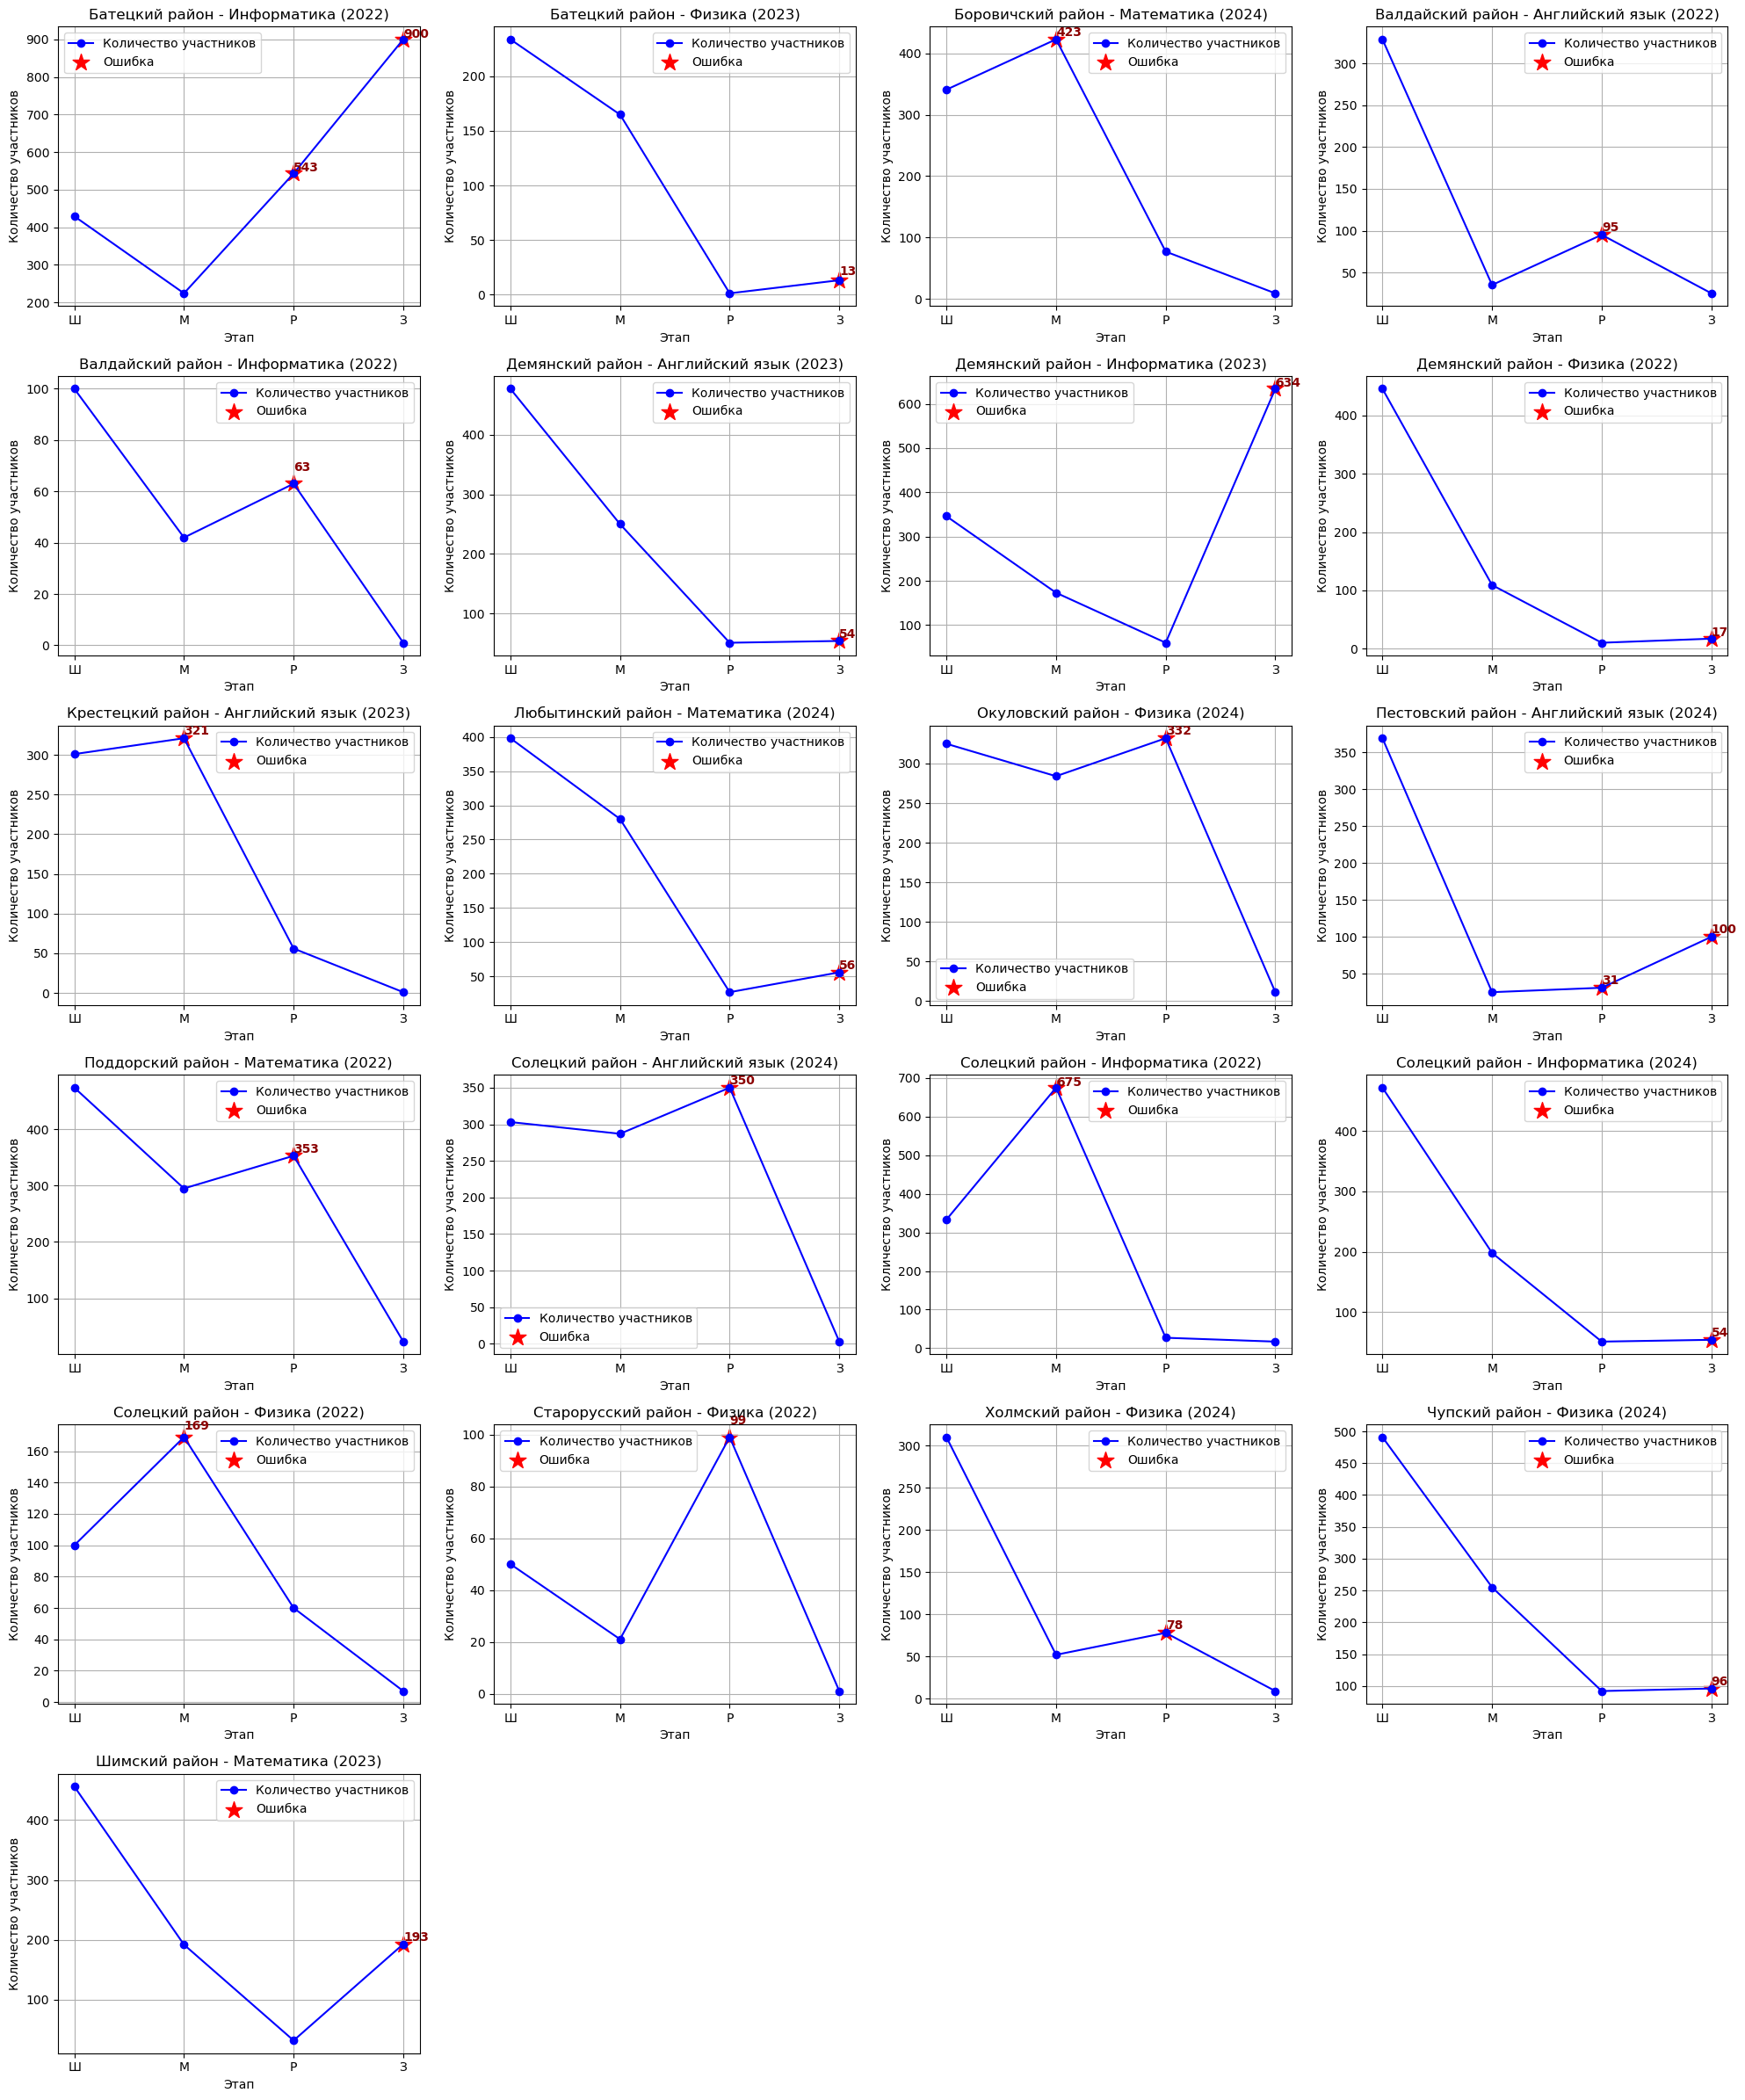

In [490]:
# Настраиваем количество графиков на строку и вычисляем размер сетки
cols = 4
groups = list(anomalies_df.groupby(["Муниципалитет", "Предмет", "Год"]))
rows = math.ceil(len(groups) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

# Итерация по группам и осям
for ax, (key, group) in zip(axes, groups):
    municipality, subject, year = key
    group = group.sort_values("Этап_порядок")

    # Построение графика
    ax.set_title(f"{municipality} - {subject} ({year})")
    ax.plot(group["Этап_порядок"], group["Количество участников"], marker='o', color='blue', label="Количество участников")
    
    # Обнаружение и визуализация ошибок
    anomalies = group[
        (group["Количество участников"].diff() > 0) & 
        (group["Этап_порядок"].diff() > 0)
    ]
    ax.scatter(anomalies["Этап_порядок"], anomalies["Количество участников"], color='red', s=200, marker='*', label="Ошибка")
    anomalies.apply(lambda row: ax.text(row["Этап_порядок"], row["Количество участников"] + 5, 
                                        f"{int(row['Количество участников'])}", 
                                        color='darkred', fontsize=10, weight='bold'), axis=1)

    # Настройки осей
    ax.set_xticks(list(stage_order.values()))
    ax.set_xticklabels(list(stage_order.keys()))
    ax.set_xlabel("Этап")
    ax.set_ylabel("Количество участников")
    ax.legend()
    ax.grid()

# Удаляем лишние оси
for ax in axes[len(groups):]:
    ax.remove()

plt.tight_layout()
plt.show()

Заменяем ошибки количеством участников предыдущего этапа умноженным на коэффициенты снижения участников, которые были высчитаны ранее

In [492]:
# Перебираем все числовые значения этапов по порядку
for i in range(df['Этап_порядок'].nunique()):
    for j, row in df[df['Этап_порядок'] == i].iterrows():
        if i == 0:
            # Для первого этапа проверяем следующий этап
            next_participants = df[
                (df['Муниципалитет'] == row['Муниципалитет']) &
                (df['Предмет'] == row['Предмет']) &
                (df['Этап_порядок'] == i + 1) &
                (df['Год'] == row['Год'])
            ]['Количество участников']

            if not next_participants.empty and row['Количество участников'] < next_participants.iloc[0]:
                new_participants = round(next_participants.iloc[0] * (coefficients[i + 1] + 1))
                df.at[j, 'Количество участников'] = new_participants
        else:
            # Для остальных этапов проверяем предыдущий этап
            prev_participants = df[
                (df['Муниципалитет'] == row['Муниципалитет']) &
                (df['Предмет'] == row['Предмет']) &
                (df['Этап_порядок'] == i - 1) &
                (df['Год'] == row['Год'])
            ]['Количество участников']

            if not prev_participants.empty and row['Количество участников'] > prev_participants.iloc[0]:
                new_participants = round(prev_participants.iloc[0] * coefficients[i - 1])
                df.at[j, 'Количество участников'] = new_participants

Проверяем заменились ли ошибки

In [494]:
# Функция для проверки группы на наличие аномалий
def check_group(group):
    group = group.sort_values("Этап_порядок")
    anomalies = group[
        (group["Количество участников"].diff() > 0) &
        (group["Этап_порядок"].diff() > 0)
    ]
    if not anomalies.empty:
        # Добавляем группирующие столбцы в результат, чтобы они не потерялись
        anomalies["Муниципалитет"] = group["Муниципалитет"].iloc[0]
        anomalies["Предмет"] = group["Предмет"].iloc[0]
        anomalies["Год"] = group["Год"].iloc[0]
        return anomalies  # Возвращаем только аномалии
    return None

# Список для хранения аномалий
anomalies_list = []

# Проходим по каждой группе вручную и применяем функцию
for name, group in df.groupby(["Муниципалитет", "Предмет", "Год"]):
    anomalies_group = check_group(group)
    if anomalies_group is not None:
        anomalies_list.append(anomalies_group)

# Объединяем все аномалии в один DataFrame
if anomalies_list:
    anomalies_df = pd.concat(anomalies_list, ignore_index=True).drop_duplicates()
    print("DataFrame с ошибками:")
    print(anomalies_df)
else:
    print("Все аномалии успешно устранены.")


Все аномалии успешно устранены.


Посмотрим на графики после обработки аномалий

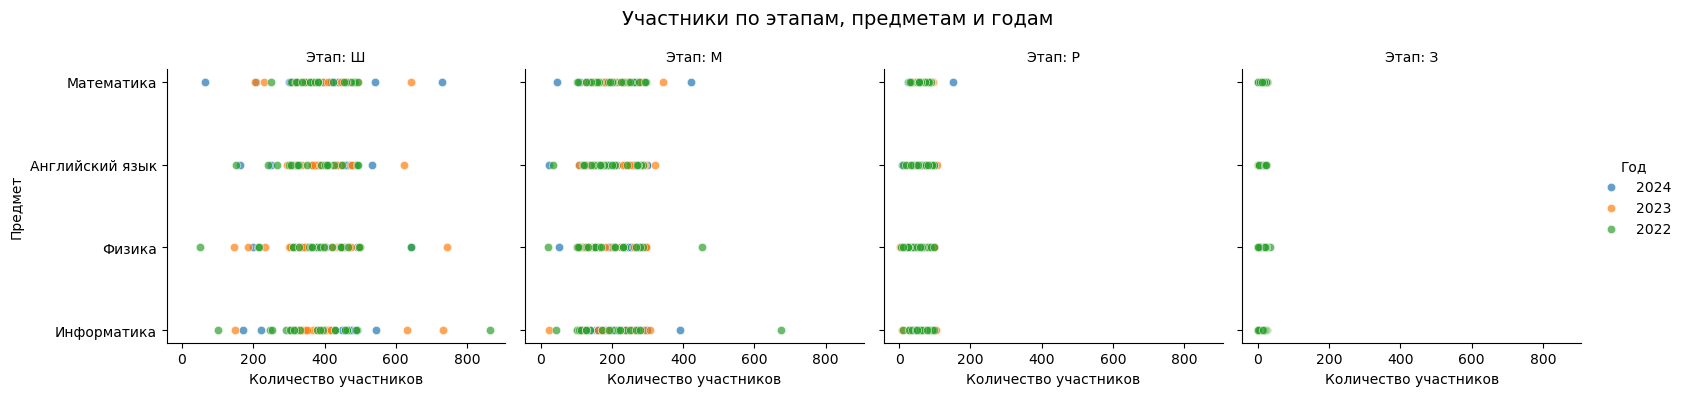

In [496]:
# Обратное отображение значений этапов
reverse_stage_order = {v: k for k, v in stage_order.items()}
df["Этап"] = df["Этап_порядок"].map(reverse_stage_order)

# Устанавливаем порядок этапов для отображения
ordered_stages = [reverse_stage_order[i] for i in sorted(stage_order.values())]

grid = sns.FacetGrid(df, col="Этап", col_wrap=4, height=4, hue="Год", col_order=ordered_stages)
grid.map(sns.scatterplot, "Количество участников", "Предмет", alpha=0.7)

grid.set_titles("Этап: {col_name}")
grid.set_axis_labels("Количество участников", "Предмет")
grid.fig.suptitle("Участники по этапам, предметам и годам", fontsize=14)

grid.add_legend(title="Год")

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()

В ходе анализа были выявлены и исправлены ошибки с превышением количества участников

## 2.4 Выполнена обработка дубликатов

In [499]:
df[df.duplicated]

,Муниципалитет,Предмет,Этап,Год,Количество участников,Этап_порядок


Дубликаты отсутствуют

In [501]:
df = df.drop_duplicates()
df[df.duplicated]

,Муниципалитет,Предмет,Этап,Год,Количество участников,Этап_порядок


## 2.5 Преобразование типов данных

In [503]:
df.dtypes 

Муниципалитет             object
Предмет                   object
Этап                      object
Год                       object
Количество участников    float64
Этап_порядок               int64
dtype: object

Поменяем тип данных для столбцов: 'Год', 'Количество участников' с object на int и у столбцов: 'Муниципалитет', 'Предмет', 'Этап' с object на string

In [505]:
df[['Год', 'Количество участников']] = df[['Год', 'Количество участников']].astype(int)
df[['Муниципалитет', 'Предмет', 'Этап']] = df[['Муниципалитет', 'Предмет', 'Этап']].astype('string')
df.dtypes

Муниципалитет            string[python]
Предмет                  string[python]
Этап                     string[python]
Год                               int32
Количество участников             int32
Этап_порядок                      int64
dtype: object

Типы данных успешно изменены

## 2.6 Оценка качества данных

- Тепловая карта

In [509]:
df

,Муниципалитет,Предмет,Этап,Год,Количество участников,Этап_порядок
0,Новгородский район,Математика,М,2024,269,1
1,Боровичский район,Математика,М,2024,423,1
2,Валдайский район,Математика,М,2024,207,1
3,Крестецкий район,Математика,М,2024,259,1
4,Любытинский район,Математика,М,2024,280,1
...,...,...,...,...,...,...
1003,Мошенской район,Информатика,З,2022,4,3
1004,Батецкий район,Информатика,З,2022,12,3
1005,Демянский район,Информатика,З,2022,2,3
1006,Холмский район,Информатика,З,2022,1,3


In [510]:
df_num = df.select_dtypes(['int'])
df_obj = df.select_dtypes(['string'])
df_obj = df_obj.apply(lambda x: pd.factorize(x)[0])
df_num = pd.concat([df_num, df_obj], axis=1)
df_num.head()

,Год,Количество участников,Этап_порядок,Муниципалитет,Предмет,Этап
0,2024,269,1,0,0,0
1,2024,423,1,1,0,0
2,2024,207,1,2,0,0
3,2024,259,1,3,0,0
4,2024,280,1,4,0,0


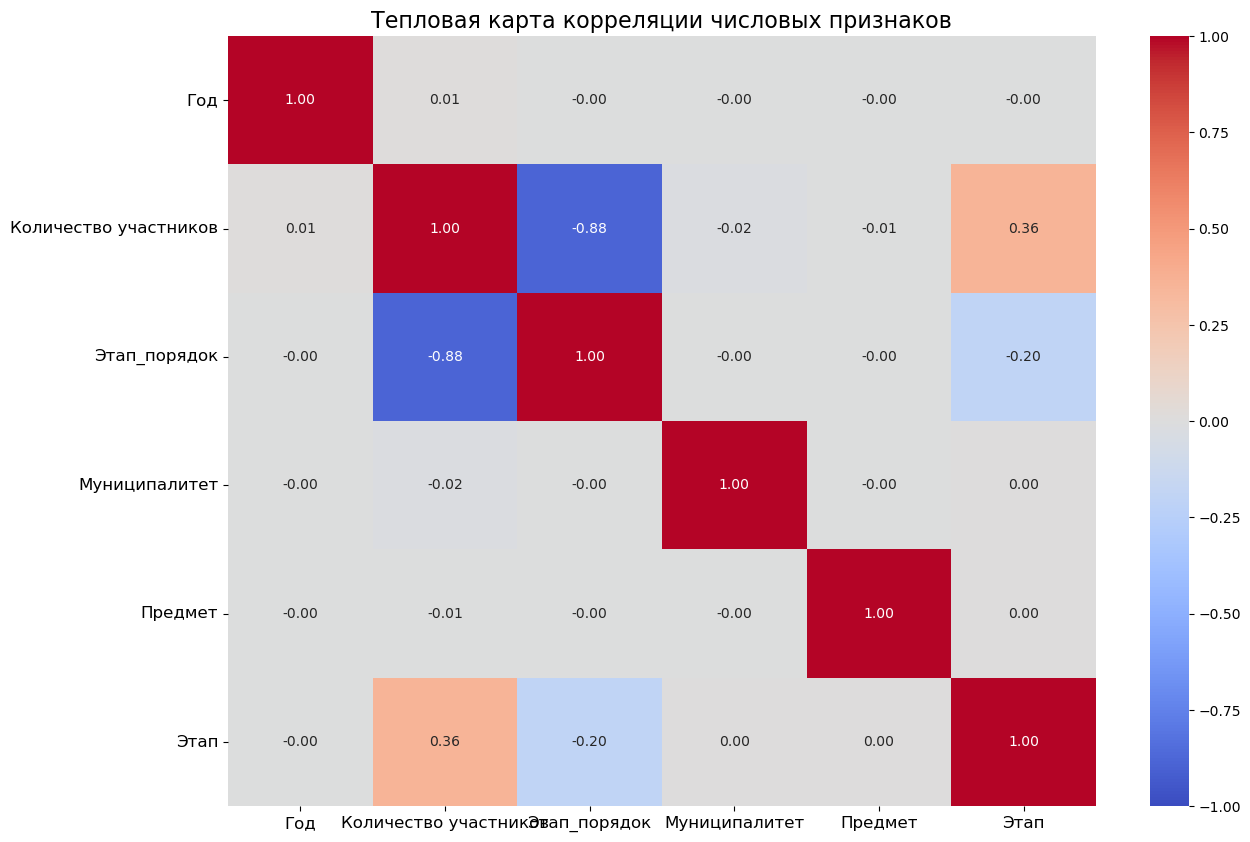

In [511]:
plt.figure(figsize=(14, 10))
sns.heatmap(data=df_num.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Тепловая карта корреляции числовых признаков", fontsize=16)
plt.xticks(fontsize=12)  # Увеличение размера подписей по оси X
plt.yticks(fontsize=12)  # Увеличение размера подписей по оси Y
plt.show()

## 3 Описание структуры набора данных

# 3.1 Текстовое описание для каждого атрибута

- Муниципалитет - это район или город, где проходит мероприятие. 
- Предмет - это дисциплина, по которой проводится конкурс или олимпиада.
- Этап - это уровень проведения мероприятия
- Год - это дата проведения мероприятия
- Количество участников - число людей, участвующих в мероприятии.
- Этап_порядок - число, обозначающее последовательность этапов

## 3.2 Иследование данных

### Диапазон значений

In [517]:
print(f'Минимальное значение количества участников: {df['Количество участников'].min()}')
print(f'Максимальное значение количества участников: {df['Количество участников'].max()}')

Минимальное значение количества участников: 0
Максимальное значение количества участников: 864


In [518]:
print(f'Минимальное значение года: {df['Год'].min()}')
print(f'Максимальное значение года: {df['Год'].max()}')

Минимальное значение года: 2022
Максимальное значение года: 2024


In [519]:
print(f'Минимальное значение порядка этапа: {df['Этап_порядок'].min()}')
print(f'Максимальное значение порядка этапа: {df['Этап_порядок'].max()}')

Минимальное значение порядка этапа: 0
Максимальное значение порядка этапа: 3


Диапазон значений для текстового типа данных найти нельзя, поэтому выделяю уникальные значения

In [521]:
df['Этап'].unique()

<StringArray>
['М', 'Р', 'З', 'Ш']
Length: 4, dtype: string

In [522]:
df['Предмет'].unique()

<StringArray>
['Математика', 'Английский язык', 'Физика', 'Информатика']
Length: 4, dtype: string

In [523]:
df['Муниципалитет'].unique()

<StringArray>
[ 'Новгородский район',   'Боровичский район',    'Валдайский район',
    'Крестецкий район',   'Любытинский район', 'Маловишерский район',
    'Пестовский район',    'Окуловский район',       'Шимский район',
     'Чеховский район',       'Чупский район',    'Поддорский район',
      'Солецкий район',  'Старорусский район',   'Хвойнинский район',
     'Чудовский район',     'Мошенской район',      'Батецкий район',
     'Демянский район',      'Холмский район',   'Волотовский район']
Length: 21, dtype: string

### Количетсво строк и столбцов

In [525]:
df.shape

(1008, 6)

1008 строк и 5 столбцов

### Типы данных

In [528]:
df.dtypes

Муниципалитет            string[python]
Предмет                  string[python]
Этап                     string[python]
Год                               int32
Количество участников             int32
Этап_порядок                      int64
dtype: object

### 3.4 Оцененка погрешности при допустимом количестве пропущенных значений

In [530]:
df_bad['Количество участников'].describe()

count    852.000000
mean     169.030516
std      163.034839
min        0.000000
25%       25.000000
50%       99.000000
75%      300.000000
max      900.000000
Name: Количество участников, dtype: float64

In [531]:
df['Количество участников'].describe()

count    1008.000000
mean      162.860119
std       158.178482
min         0.000000
25%        23.000000
50%        97.500000
75%       287.000000
max       864.000000
Name: Количество участников, dtype: float64

Сильных изменений не произошло, мы видим, что максимальное и минимальное значение остались одинаковыми, а остальные параметры незначительно изменились, т.е. погрешность незначительна

## 3.5 Файл с данными в формате csv

In [534]:
df.to_csv(r'C:\Users\Fylht\OneDrive\Колледж\Python\Чемп\BI - аналитика\Подготовка\Модуль А\data_A.csv', index=False)